In [4]:
import pandas as pd
import numpy as np
import re

In [6]:
dataset = pd.read_csv('spotify_tracks.csv')
dataset.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,7wrYBASu0OoxoDErd4Edxd,Bombay Jayashri,Rehnaa Hai Terre Dil Mein,Zara Zara,58,298266,False,0.643,0.268,11,-15.073,0,0.0900,0.593,0.000002,0.316,0.620,143.813,4,classical
1,72HdutlIHBZJ7WT1xVAAZT,Shankar;Ehsaan;Loy;Alisha Chinai;Shankar Mahad...,NaN,Kajra Re,59,482586,False,0.484,0.898,0,-4.132,1,0.1640,0.365,0.000000,0.091,0.680,91.975,4,classical
2,7JGgKHHDgJCJkQCQxyHHdl,Bombay Jayashri;DJ Aftab,Hindi Slowed Reverb Bollywood Lofi,Zara Zara - Lofi,54,219437,False,0.608,0.638,11,-6.008,0,0.0292,0.581,0.017200,0.448,0.439,140.109,4,classical
3,3YRj4jmwois2ctPnhwSwFo,Bombay Jayashri,Minnalae,Vaseegara,68,299146,False,0.695,0.293,11,-16.278,0,0.0431,0.596,0.015800,0.132,0.637,143.804,4,classical
4,3tp3ij9dtY3CacQgd1OvRf,Bombay Jayashri;Swattrex,Hindi LoFi Vibe,Zara Zara - LoFi Chill,59,387716,False,0.583,0.308,7,-18.303,0,0.0465,0.581,0.010600,0.257,0.241,118.226,4,classical


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          6000 non-null   object 
 1   artists           6000 non-null   object 
 2   album_name        5498 non-null   object 
 3   track_name        6000 non-null   object 
 4   popularity        6000 non-null   int64  
 5   duration_ms       6000 non-null   int64  
 6   explicit          5888 non-null   object 
 7   danceability      6000 non-null   float64
 8   energy            5920 non-null   float64
 9   key               6000 non-null   int64  
 10  loudness          6000 non-null   float64
 11  mode              6000 non-null   int64  
 12  speechiness       6000 non-null   float64
 13  acousticness      6000 non-null   float64
 14  instrumentalness  6000 non-null   float64
 15  liveness          6000 non-null   float64
 16  valence           6000 non-null   float64


## Handle missing values




In [10]:
dataset.isna().sum()

,0
track_id,0
artists,0
album_name,502
track_name,0
popularity,0
duration_ms,0
explicit,112
danceability,0
energy,80
key,0


In [12]:
missing_values = ['album_name','explicit','energy']
dataset[missing_values].nunique()

,0
album_name,2678
explicit,2
energy,1177


In [22]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy="mean")
dataset["energy"] = mean_imputer.fit_transform(dataset[["energy"]])


mfv = dataset["explicit"].value_counts().index[0]
dataset["explicit"] = dataset["explicit"].fillna(mfv)

# Drop duplicate rows and irrelevant features
dataset.drop_duplicates(inplace = True)
dataset.drop(columns = ['track_id','album_name'],inplace = True)

## Clean Text data



In [26]:
pattern = r'[\[\]()\-:;",/\.\.\.‘\'’?!“&]'
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words(fileids=('english', 'spanish'))
stopwords = [word.replace("\n","") for word in stopwords]
stopwords.extend(["love", "remastered", "remaster", "feat", "remix", "version"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
clean_tracks = []

for track in dataset["track_name"].to_list():
  track = track.lower()
  track = re.sub(pattern, "", track).replace("  "," ")

  clean_text = [text for text in track.split(" ") if text not in stopwords]
  clean_text = " ".join(clean_text)
  clean_tracks.append(clean_text)

dataset['track_name'] = clean_tracks

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Bombay Jayashri,zara zara,58,298266,False,0.643,0.268,11,-15.073,0,0.0900,0.593,0.000002,0.316,0.620,143.813,4,classical
1,Shankar;Ehsaan;Loy;Alisha Chinai;Shankar Mahad...,kajra,59,482586,False,0.484,0.898,0,-4.132,1,0.1640,0.365,0.000000,0.091,0.680,91.975,4,classical
2,Bombay Jayashri;DJ Aftab,zara zara lofi,54,219437,False,0.608,0.638,11,-6.008,0,0.0292,0.581,0.017200,0.448,0.439,140.109,4,classical
3,Bombay Jayashri,vaseegara,68,299146,False,0.695,0.293,11,-16.278,0,0.0431,0.596,0.015800,0.132,0.637,143.804,4,classical
4,Bombay Jayashri;Swattrex,zara zara lofi chill,59,387716,False,0.583,0.308,7,-18.303,0,0.0465,0.581,0.010600,0.257,0.241,118.226,4,classical


In [38]:
def clean_artist(x):
  return x.split(";")[0]

dataset['artists'] = dataset['artists'].apply(clean_artist)


# Data Exploration

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Data analysis

Analyzing and describing the characteristics of variables individually

### Categorical variables

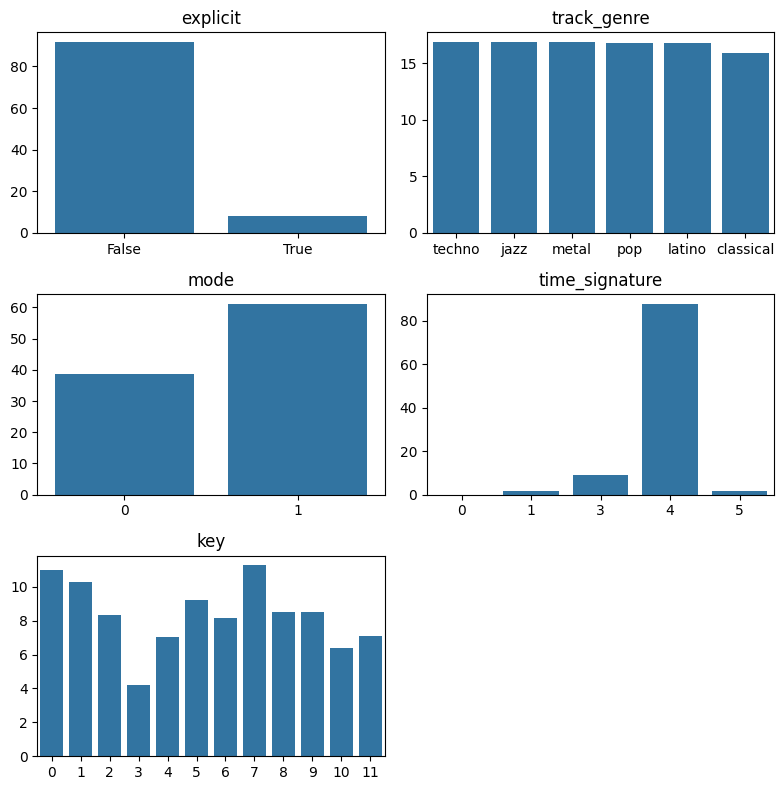

In [46]:
categorical_var = dataset.select_dtypes(include=["object", "bool"]).columns.to_list()
categorical_var.extend(["key", "mode", "time_signature"])

# Create barplot with frequency for each variable
plt.figure(figsize=(8, 8))

for c,var in enumerate(df_barplot.columns):
  # compute frequency of each unique value
  df = df_barplot[var].value_counts(normalize=True).to_frame("frequency").reset_index(names=var)
  df["frequency"] = df["frequency"]*100

  # plot the barplot
  plt.subplot(3, 2, c+1)
  sns.barplot(data=df, x=var, y="frequency")
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

### Continuous variables

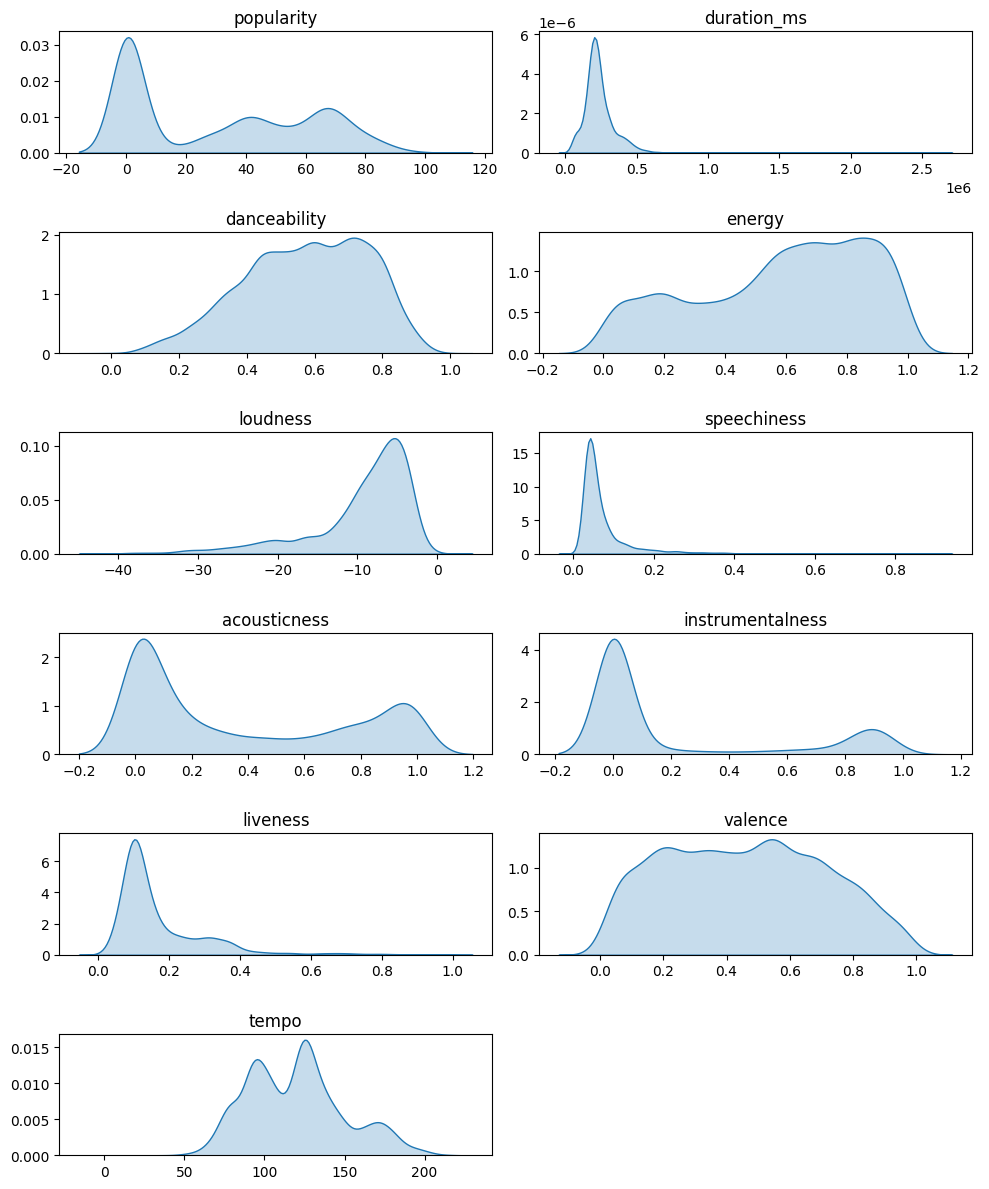

In [49]:
continuous_var = dataset.drop(columns = categorical_var).columns.to_list()
plt.figure(figsize=(10, 12))

for c,var in enumerate(continuous_var):
  plt.subplot(6, 2, c+1)
  sns.kdeplot(data=dataset[continuous_var], x=var, fill=var)
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

## Detect outliers

Outliers are data points that significantly deviates from the majority of the data.
Keeping those extreme values can lead to suboptimal performances and can hinder a model's ability to generalize.

There are two main ways to detect outliers:
- Using summary statistics such as mean, median, first and third quartile
- Using statistical plots such as **boxplots** that show where most of the data is concentrated (in the interquartile range) as well as which points are extreme

In [50]:
dataset[continuous_var].describe().round(2)

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,5926.00,5926.00,5926.00,5926.00,5926.00,5926.00,5926.00,5926.00,5926.00,5926.00,5926.00
mean,30.73,237772.36,0.57,0.58,-9.44,0.07,0.37,0.22,0.17,0.46,119.67
std,29.98,121564.79,0.18,0.28,6.46,0.07,0.38,0.36,0.13,0.25,30.24
min,0.00,17453.00,0.00,0.00,-41.53,0.00,0.00,0.00,0.02,0.00,0.00
25%,0.00,175986.00,0.44,0.37,-11.25,0.04,0.02,0.00,0.09,0.24,95.02
50%,30.00,216846.00,0.59,0.63,-7.41,0.05,0.19,0.00,0.12,0.46,120.07
75%,61.00,273323.00,0.72,0.82,-5.08,0.08,0.77,0.35,0.20,0.66,136.47
max,100.00,2646866.00,0.97,1.00,1.02,0.90,1.00,0.98,0.99,0.98,214.02


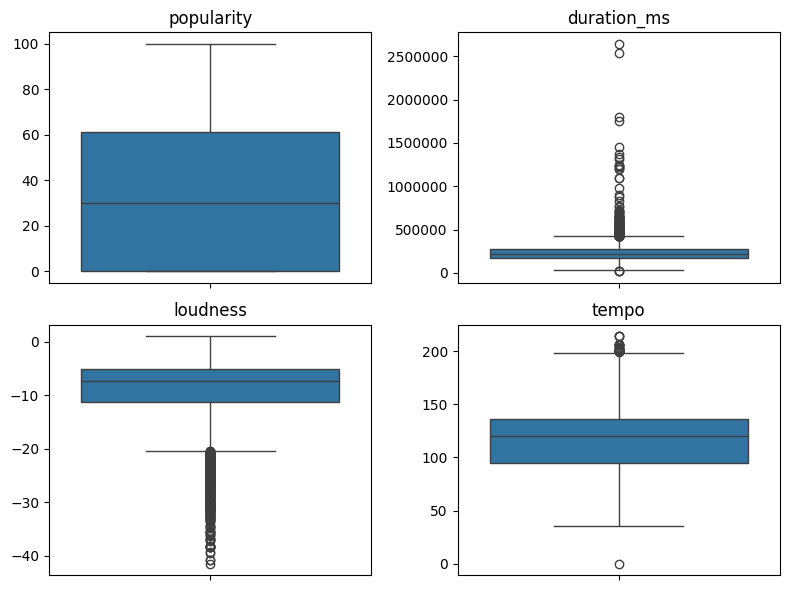

In [51]:
# Create boxplots for continuous variables without a defined range
continuous_var_other = ["popularity", "duration_ms", "loudness", "tempo"]

plt.figure(figsize=(8, 6))
for c,var in enumerate(continuous_var_other):
  plt.subplot(2, 2, c+1)
  ax = sns.boxplot(data=dataset[continuous_var_other], y=var)
  ax.ticklabel_format(style='plain', axis='y')
  plt.title(str(var))
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

## Multivariate Data analysis

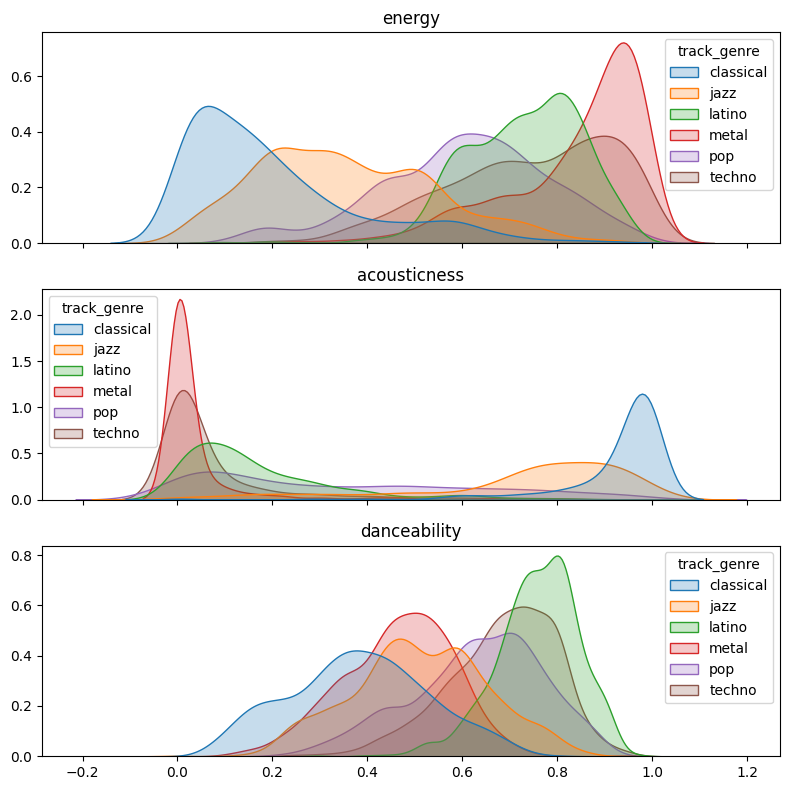

In [52]:
fig, axes = plt.subplots(3, sharex=True, figsize=(8, 8))

for ax, var in zip(axes, ["energy", "acousticness", "danceability"]):
  sns.kdeplot(data=dataset, x=var, hue="track_genre", fill="track_genre", ax=ax);
  ax.set_title(var)
  ax.set_xlabel("")
  ax.set_ylabel("")

plt.tight_layout()

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset[continuous_var].corr().abs(), annot=True);

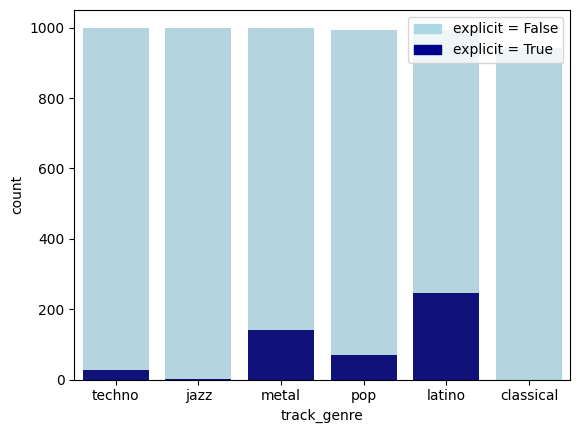

In [53]:
import matplotlib.patches as mpatches

# create dataframe to count track_genre/mode
df_genre_explicit = dataset[["track_genre","explicit"]].value_counts().to_frame("count").reset_index()

# add row for classifical genre with track_genre = True (frequency=0)
classical_explicit_True = {"track_genre":"classical","explicit":True, "count":0}
df_genre_explicit = pd.concat([df_genre_explicit, pd.DataFrame([classical_explicit_True])], ignore_index=True)

# create barplots
bar1 = sns.barplot(data=dataset["track_genre"].value_counts().to_frame("count").reset_index(names="track_genre"), x="track_genre", y="count", color='lightblue');
bar2 = sns.barplot(data=df_genre_explicit.loc[df_genre_explicit["explicit"]==True], x="track_genre", y="count", color='darkblue');

# add legends
bottom_bar = mpatches.Patch(color='darkblue', label='explicit = True')
top_bar = mpatches.Patch(color='lightblue', label='explicit = False')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

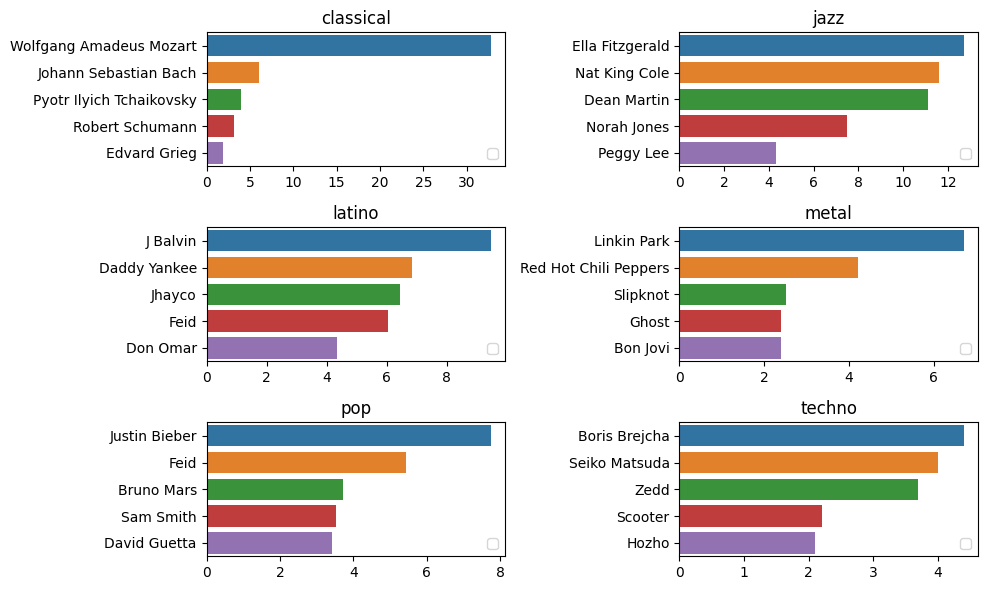

In [54]:
# Top 3 artists per genre
top_artists_per_genre = dict()
plt.figure(figsize=(10, 6))

for c, genre in enumerate(dataset["track_genre"].unique()):
  df = dataset.loc[dataset["track_genre"]==genre,"artists"].value_counts(normalize=True).to_frame("frequency").reset_index(names="artists")
  df = df.sort_values(by=["frequency"],ascending=False)
  df["frequency"] = (100*df["frequency"]).round(2)
  top_artists_per_genre[genre] = df.head(1)["artists"].to_list()[0]

  plt.subplot(3,2,c+1)
  sns.barplot(data=df.head(5), x="frequency", y="artists", hue="artists")
  plt.title(genre)
  plt.xlabel("")
  plt.ylabel("")
  plt.legend("")

plt.tight_layout()